In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import colormaps
import matplotlib.patches as patches
import matplotlib.lines as lines
import seaborn as sns
import gc



filenames = ['random_1', 'random_2', 'random_3', 'random_4', 'random_5', 'random_6', 'random_7', 'random_8', 'random_9', 'random_10', 'random_11', 'random_12', 'random_13', 'random_14', 'random_15', 'random_16', 'random_17', 'random_18', 'random_19', 'random_20', 'clustered_1', 'clustered_2', 'clustered_3', 'clustered_4', 'clustered_5', 'clustered_6', 'clustered_7', 'clustered_8', 'clustered_9', 'clustered_10', 'clustered_11', 'clustered_12', 'clustered_13', 'clustered_14', 'clustered_15', 'clustered_16', 'clustered_17', 'clustered_18', 'clustered_19', 'clustered_20']
path = "../blossom/hpc/outputs/"
sample_times = [252, 415, 310, 192, 241, 308, 338, 231, 241, 233, 241, 330, 246, 246, 161, 327, 158, 218, 291, 431, 206, 185, 307, 258, 287, 244, 335, 291, 151, 206, 167, 356, 208, 224, 271, 181, 179, 279, 305, 246]
organism_group_labels = ["Bacteria", "Fungi", "Root-feeding Nematodes", "Bacterivorous Nematodes", "Fungivorous Nematodes", "Omnivorous Nematodes", "Fungivorous Mites", "Omnivorous Mites", "Collembolans"]
x_max = 400
y_max = 400

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.style.use("seaborn-v0_8-whitegrid")

def rand_jitter(arr):
    if(len(arr)):
        stdev = .00025 * (max(arr) - min(arr))
        return arr + np.random.randn(len(arr)) * stdev
    return arr

In [12]:
idx = 0
filename = filenames[idx]

df = pd.read_csv(path + filename + ".csv")
n = len(df["type"].unique())
colors = colormaps['tab10'].colors
counts_per_type = df.value_counts(['type', 'tick'])

sample_locations = [(50, 50), (50, 150), (50, 250), (50, 350), (125, 150), (175, 250), (275, 150), (225, 250), (350, 50), (350, 150), (350, 250), (350, 350)]
sample_locations = [(50, 50), (50, 150), (50, 250), (50, 350), (150, 50), (150, 150), (150, 250), (150, 350), (250, 50), (250, 150), (250, 250), (250, 350),  (350, 50), (350, 150), (350, 250), (350, 350)]

In [13]:
def plot_von_neumann(ax, center_x, center_y, ranges):
    # Define a list of colors that contrast well with orange
    colors_legend = ['blue', 'teal', 'darkblue', 'darkviolet', 'indigo']  # Adjusted colors
    
    # Plot only the outer boundary cells of the Von Neumann neighborhood
    # The outer boundary cells form a diamond shape.
    for i in reversed(range(len(ranges))):
        r = ranges[i]
        # Define the color for the current range
        color = colors_legend[i % len(colors_legend)]
        
        # Top and bottom edges of the diamond
        for dx in range(-r, r + 1):
            dy = r - abs(dx)
            ax.add_patch(patches.Rectangle((center_x + dx - 0.5, center_y + dy - 0.5), 1, 1, edgecolor=color, facecolor='none', linewidth=1))
            ax.add_patch(patches.Rectangle((center_x + dx - 0.5, center_y - dy - 0.5), 1, 1, edgecolor=color, facecolor='none', linewidth=1))
        
        # Left and right edges of the diamond
        for dy in range(-r + 1, r):
            dx = r - abs(dy)
            ax.add_patch(patches.Rectangle((center_x - dx - 0.5, center_y + dy - 0.5), 1, 1, edgecolor=color, facecolor='none', linewidth=1))
            ax.add_patch(patches.Rectangle((center_x + dx - 0.5, center_y + dy - 0.5), 1, 1, edgecolor=color, facecolor='none', linewidth=1))

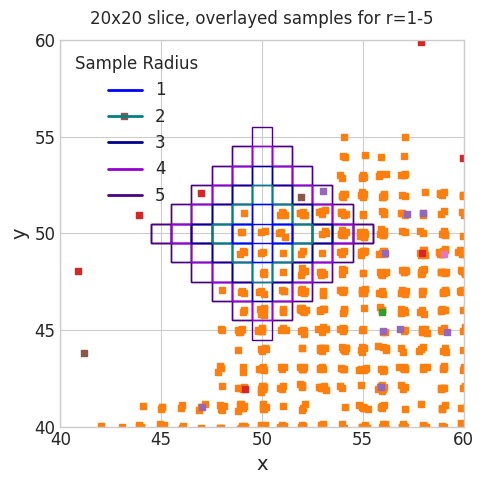

In [14]:
fig, ax = plt.subplots(figsize=(5, 5))
i=0

df1 = df[df["tick"] == sample_times[idx]]
for t in np.unique(df1["type"]):
    subset_type = df1[df1['type'] == t]
    ax.scatter(rand_jitter(subset_type['x']), rand_jitter(subset_type['y']), color=colors[t], label=t, s=15, marker='s')
# Add Von Neumann neighborhoods for all sample locations
for (loc_x, loc_y) in sample_locations:
    plot_von_neumann(ax, loc_x, loc_y, range(1, 6))    

ax.set_title(f'20x20 slice, overlayed samples for r=1-5', y=1.02)
ax.set_xlabel('x')
ax.set_yticks([40, 45, 50, 55, 60])
ax.set_xticks([40, 45, 50, 55, 60])
ax.set_yticklabels([40, 45, 50, 55, 60])
ax.set_xticklabels([40, 45, 50, 55, 60])
ax.set_ylabel('y')
ax.set_xlim(sample_locations[i][0] - 10, sample_locations[i][0] + 10)
ax.set_ylim(sample_locations[i][1] - 10, sample_locations[i][1] + 10)


colors_legend = ['blue', 'teal', 'darkblue', 'darkviolet', 'indigo']
# Create a legend with one entry per range
legend_handles = [lines.Line2D([0], [0], color=colors_legend[i], lw=2) for i in range(5)]
range_labels = [str(r) for r in range(1,6)]
ax.legend(legend_handles, range_labels, title='Sample Radius', loc='upper left')

plt.tight_layout()
plt.savefig('6-sample-diameter.pdf')
plt.show()

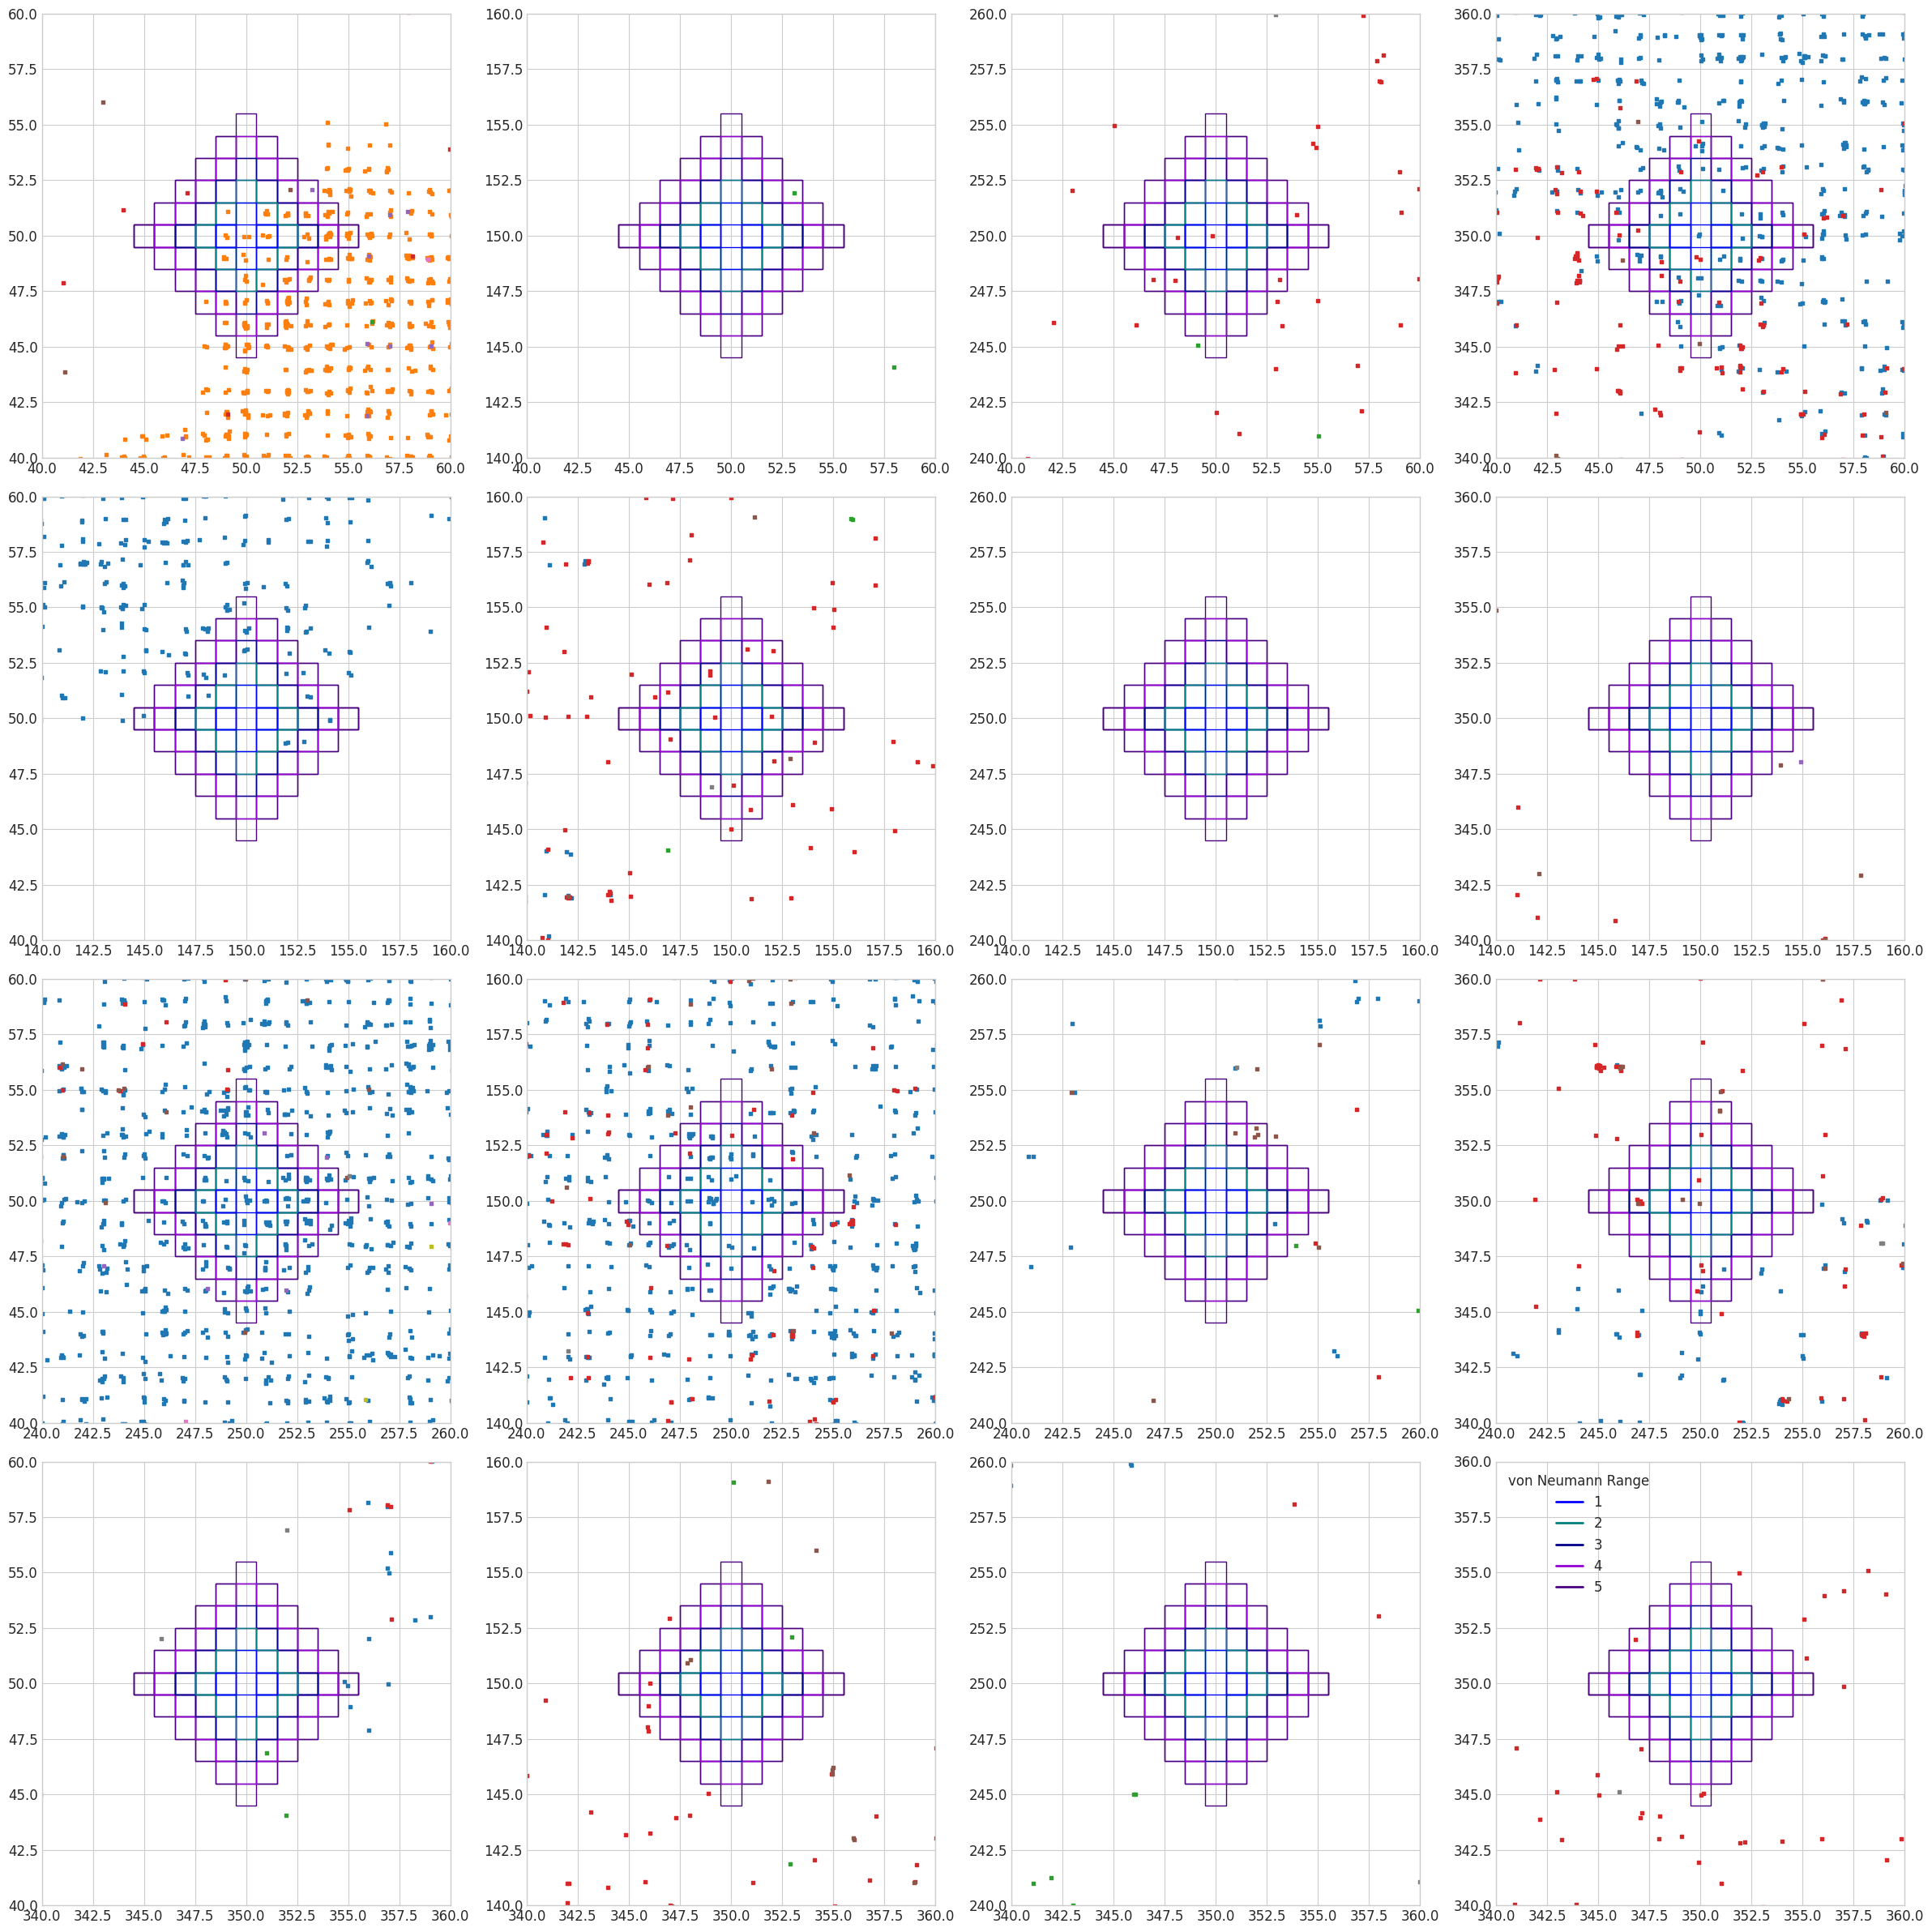

In [15]:
fig, axes = plt.subplots(4,4, figsize=(24, 24))

for i, ax in enumerate(axes.flatten()):

    df1 = df[df["tick"] == sample_times[idx]]
    for t in np.unique(df1["type"]):
        subset_type = df1[df1['type'] == t]
        ax.scatter(rand_jitter(subset_type['x']), rand_jitter(subset_type['y']), color=colors[t], label=t, s=5, marker='s')

    # Add Von Neumann neighborhoods for all sample locations
    for (loc_x, loc_y) in sample_locations:
        plot_von_neumann(ax, loc_x, loc_y, range(1, 6))    

    #ax.set_title(f'20x20 slice of {filename} at sample time, with overlayed samples for r=1-5', y=1.02)
    #ax.set_xlabel('x')
    #ax.set_ylabel('y')
    ax.set_xlim(sample_locations[i][0] - 10, sample_locations[i][0] + 10)
    ax.set_ylim(sample_locations[i][1] - 10, sample_locations[i][1] + 10)


colors_legend = ['blue', 'teal', 'darkblue', 'darkviolet', 'indigo']
# Create a legend with one entry per range
legend_handles = [lines.Line2D([0], [0], color=colors_legend[i], lw=2) for i in range(5)]
range_labels = [str(r) for r in range(1,6)]
ax.legend(legend_handles, range_labels, title='von Neumann Range', loc='upper left')

plt.tight_layout()
plt.savefig('6-sample-diameter-all.pdf')
plt.show()

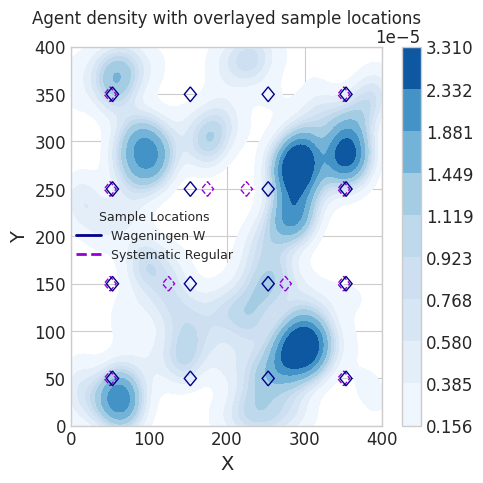

In [16]:
# Define the sampling locations
sys_reg_locations = [(50, 50), (50, 150), (50, 250), (50, 350), (125, 150), (175, 250), (275, 150), (225, 250), (350, 50), (350, 150), (350, 250), (350, 350)]
wageningen_w_locations = [(50, 50), (50, 150), (50, 250), (50, 350), (150, 50), (150, 150), (150, 250), (150, 350), (250, 50), (250, 150), (250, 250), (250, 350),  (350, 50), (350, 150), (350, 250), (350, 350)]
df1 = df[df["tick"] == sample_times[idx]]
def plot_von_neumann(ax, center_x, center_y, r, color, linestyle):
    # Top and bottom edges
    ax.add_patch(patches.Rectangle((center_x + 0.25, center_y - 8), 11, 11, angle=45, edgecolor=color, facecolor='none', linewidth=1, linestyle=linestyle))
        
# Create the heatmap for agent density
plt.figure(figsize=(5, 5))
ax = plt.gca()
# Plot the density heatmap
sns.kdeplot(data=df1, x='x', y='y', cmap='Blues', fill=True, ax=ax, cbar=True)

# Overlay Systematic Regular Von Neumann neighborhoods with radius 5
for (x, y) in sys_reg_locations:
    plot_von_neumann(ax, x, y, r=5, color='darkviolet', linestyle='--')  # Red dashed lines for Systematic Regular grid

# Overlay Wageningen W Von Neumann neighborhoods with radius 5
for (x, y) in wageningen_w_locations:
    plot_von_neumann(ax, x + 3, y, r=5, color='darkblue', linestyle='-')  # Green solid lines for Wageningen W grid

# Set plot limits and labels
ax.set_xlim(0, 400)
ax.set_ylim(0, 400)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Agent density with overlayed sample locations', y=1.04)

legend_handles = [lines.Line2D([0], [0], color='darkblue', lw=2, linestyle='-'), lines.Line2D([0], [0], color='darkviolet', lw=2, linestyle='--')]
range_labels = ['Wageningen W', 'Systematic Regular']
ax.legend(legend_handles, range_labels, title='Sample Locations', loc=(0, 0.42), prop={'size': 9}, title_fontsize=9)

# Show plot
plt.tight_layout()
plt.savefig('6-sampling-locs.pdf')
plt.show()

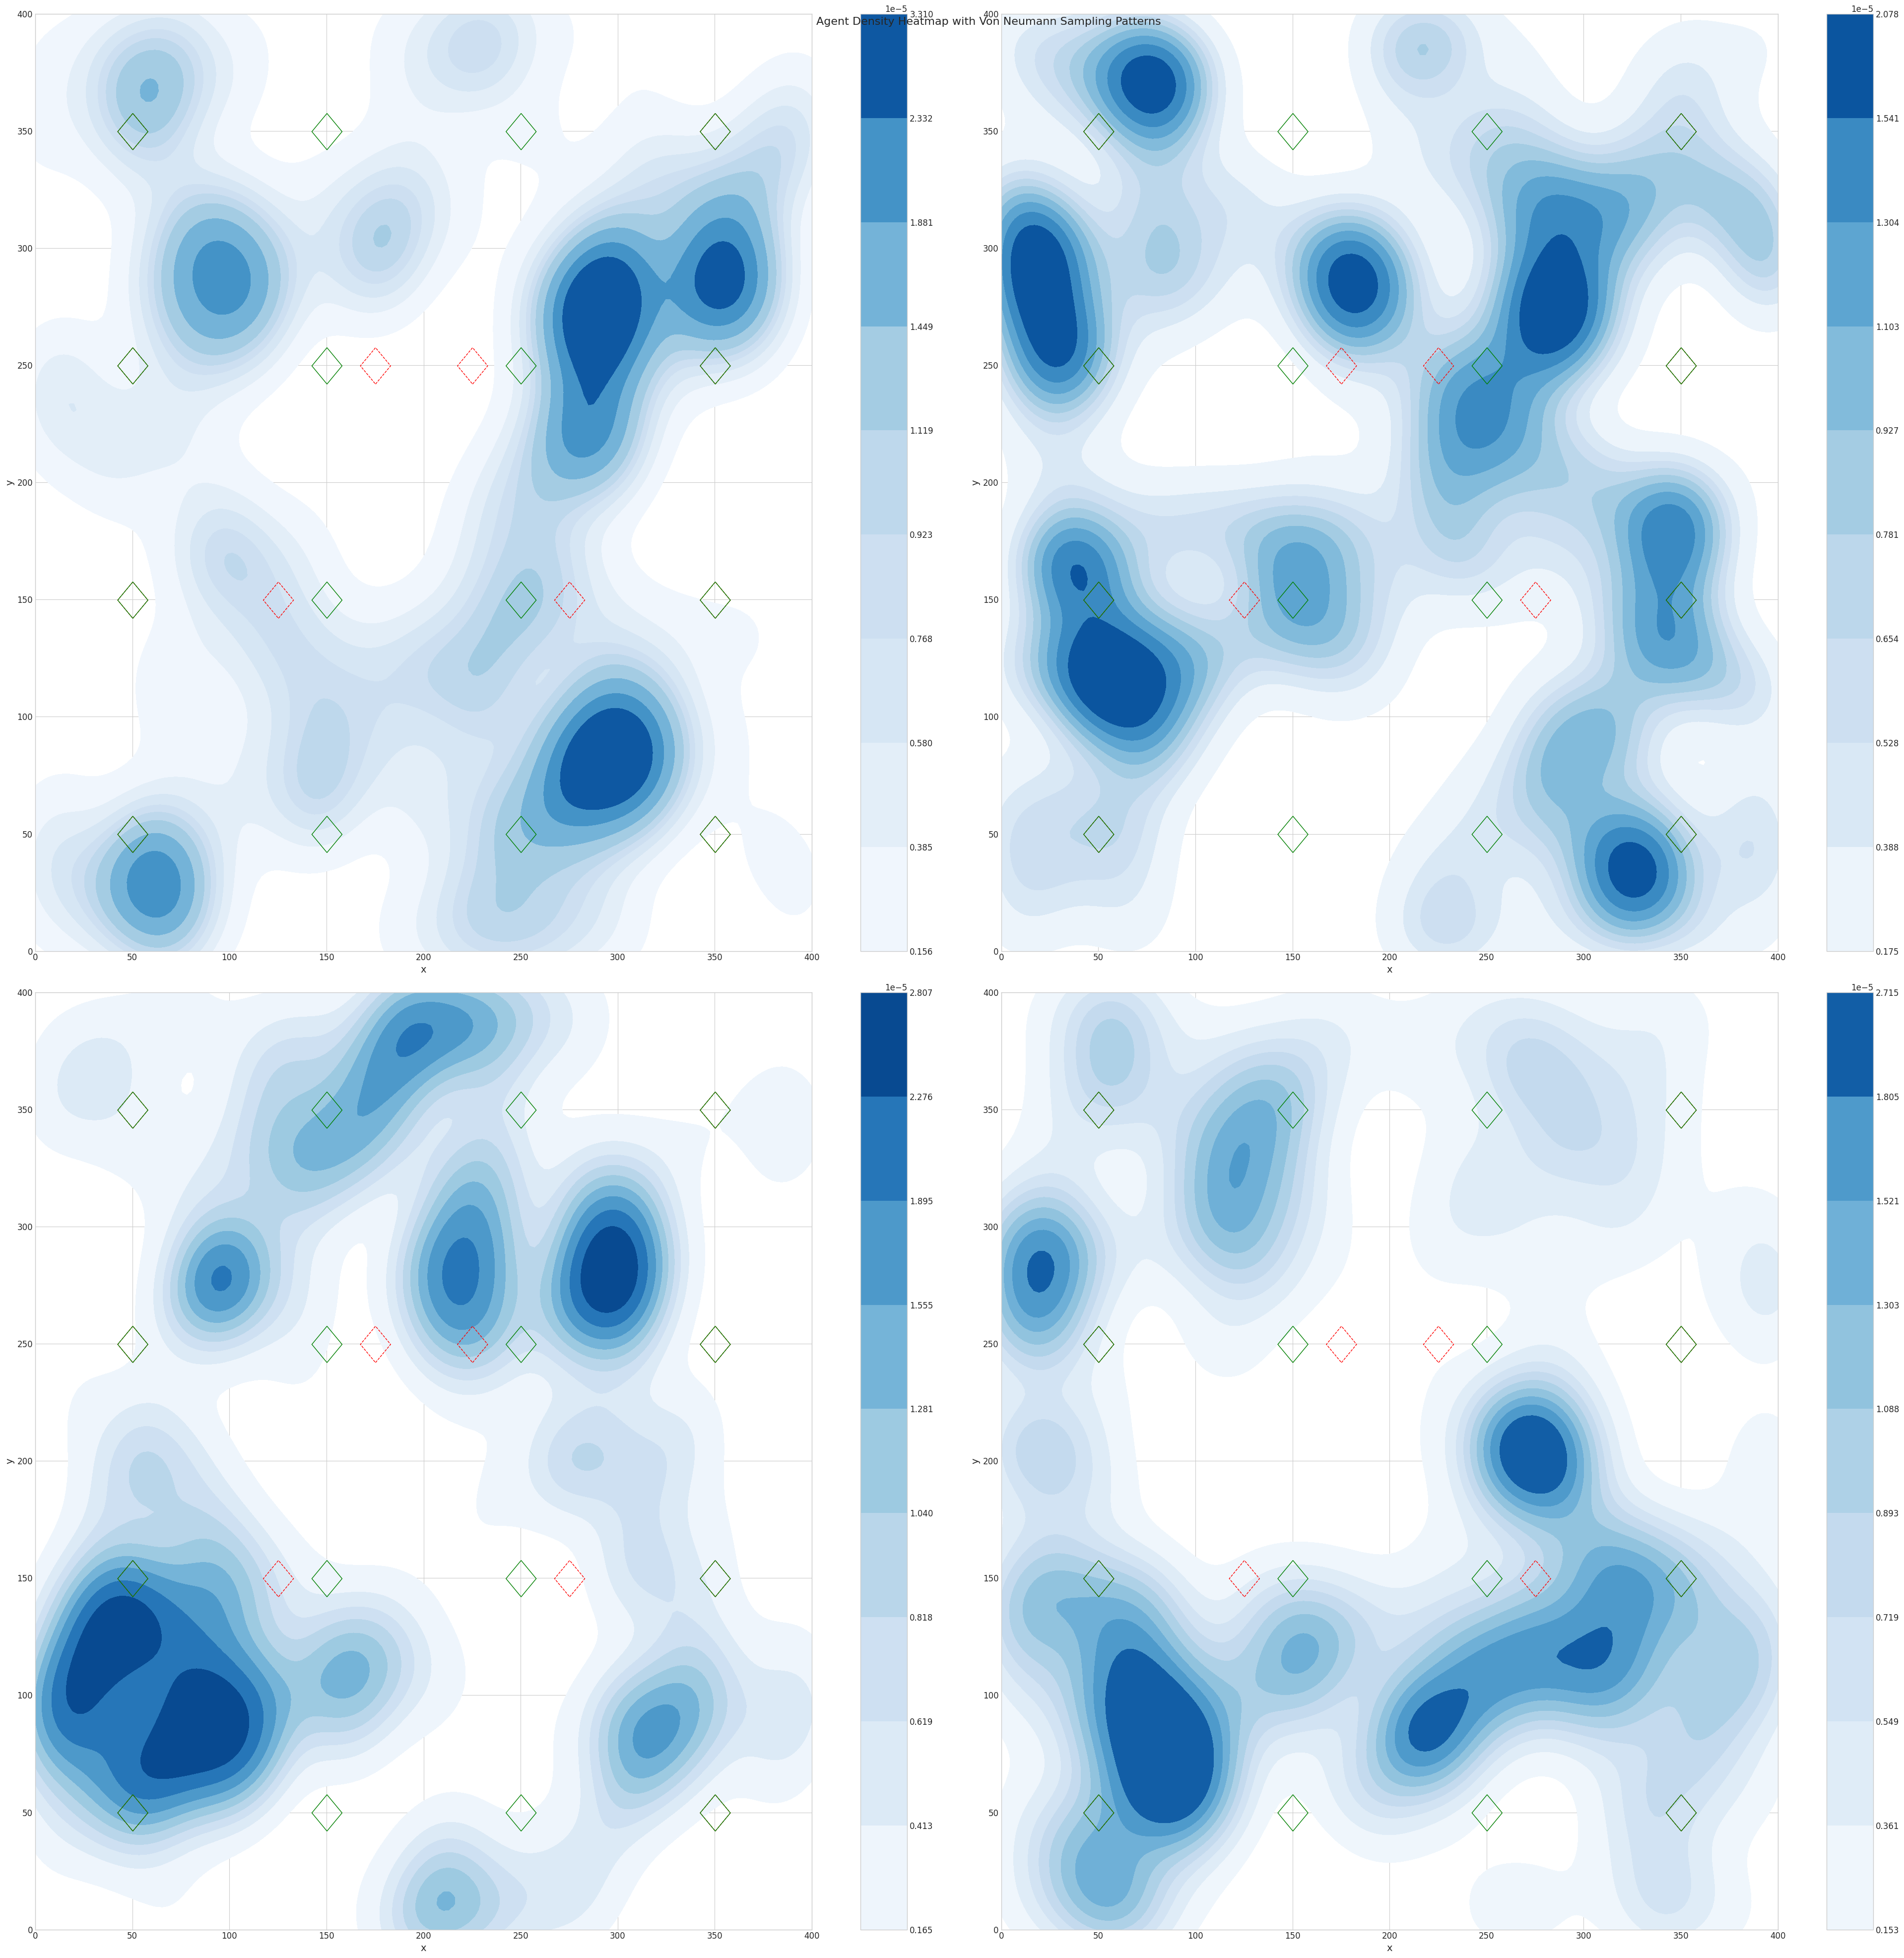

In [17]:
# Define the sampling locations
sys_reg_locations = [(50, 50), (50, 150), (50, 250), (50, 350), (125, 150), (175, 250), (275, 150), (225, 250), (350, 50), (350, 150), (350, 250), (350, 350)]
wageningen_w_locations = [(50, 50), (50, 150), (50, 250), (50, 350), (150, 50), (150, 150), (150, 250), (150, 350), (250, 50), (250, 150), (250, 250), (250, 350),  (350, 50), (350, 150), (350, 250), (350, 350)]

def plot_von_neumann(ax, center_x, center_y, color, linestyle):
    # Top and bottom edges
    ax.add_patch(patches.Rectangle((center_x + 0.25, center_y - 8), 11, 11, angle=45, edgecolor=color, facecolor='none', linewidth=1, linestyle=linestyle))

fig, axes = plt.subplots(2,2, figsize=(40, 40))

for i, ax in enumerate(axes.flatten()):
    df = pd.read_csv(path + filenames[i] + '.csv')
    df1 = df[df["tick"] == sample_times[idx]]
    del df
    gc.collect()

    # Plot the density heatmap
    sns.kdeplot(data=df1, x='x', y='y', cmap='Blues', fill=True, ax=ax, cbar=True)

    # Overlay Systematic Regular Von Neumann neighborhoods with radius 5
    for (x, y) in sys_reg_locations:
        plot_von_neumann(ax, x, y, color='red', linestyle='--')  # Red dashed lines for Systematic Regular grid

    # Overlay Wageningen W Von Neumann neighborhoods with radius 5
    for (x, y) in wageningen_w_locations:
        plot_von_neumann(ax, x, y, color='green', linestyle='-')  # Green solid lines for Wageningen W grid

    # Set plot limits and labels
    ax.set_xlim(0, 400)
    ax.set_ylim(0, 400)
    #ax.set_xlabel('X Coordinate')
    #ax.set_ylabel('Y Coordinate')

plt.suptitle('Agent Density Heatmap with Von Neumann Sampling Patterns')
    
# Show plot
plt.tight_layout()
plt.savefig('6-sampling-locs-plots.pdf')
plt.show()

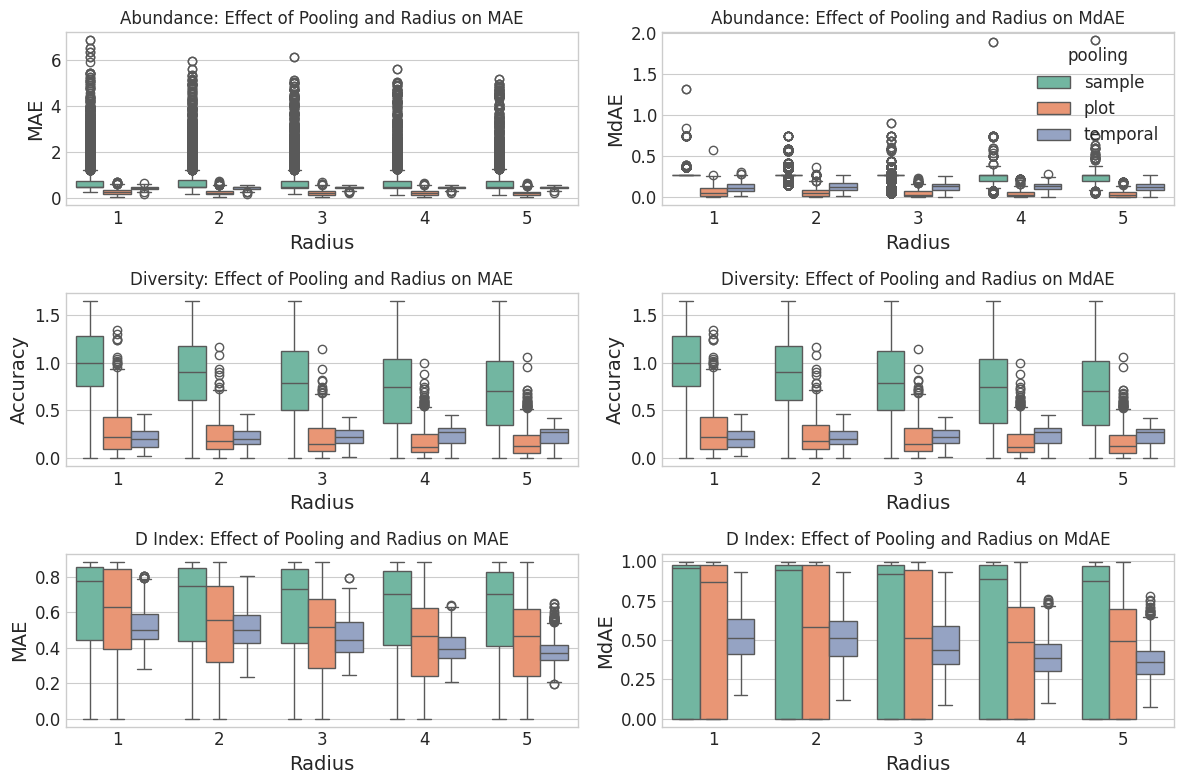

In [5]:
df1 = pd.read_csv('../experiments/analysis_out/abundances_temporal_w.csv')
df1['distribution'] = pd.Series('clustered', index=df1.index).mask(df1['filename'].str.contains('random'), 'random')
df2 = pd.read_csv('../experiments/analysis_out/abundances_temporal_reg.csv')
df2['distribution'] = pd.Series('clustered', index=df2.index).mask(df2['filename'].str.contains('random'), 'random')
# Combine df1 and df2 into a single DataFrame
df_combined_t = pd.concat([df1, df2])
df_combined_t['pooling'] = 'temporal'

df1 = pd.read_csv('../experiments/analysis_out/abundances_plot_w.csv')
df1['distribution'] = pd.Series('clustered', index=df1.index).mask(df1['filename'].str.contains('random'), 'random')
df2 = pd.read_csv('../experiments/analysis_out/abundances_plot_reg.csv')
df2['distribution'] = pd.Series('clustered', index=df2.index).mask(df2['filename'].str.contains('random'), 'random')
# Combine df1 and df2 into a single DataFrame
df_combined_p = pd.concat([df1, df2])
df_combined_p['pooling'] = 'plot'

df1 = pd.read_csv('../experiments/analysis_out/abundances_sample_w.csv')
df1['distribution'] = pd.Series('clustered', index=df1.index).mask(df1['filename'].str.contains('random'), 'random')
df2 = pd.read_csv('../experiments/analysis_out/abundances_sample_reg.csv')
df2['distribution'] = pd.Series('clustered', index=df2.index).mask(df2['filename'].str.contains('random'), 'random')
# Combine df1 and df2 into a single DataFrame
df_combined_s = pd.concat([df1, df2])
df_combined_s['pooling'] = 'sample'

df_combined = pd.concat([df_combined_s, df_combined_p, df_combined_t])

# Set up the matplotlib figure with a 4x4 grid (2x2 plots: mae_w, mae_reg, mdae_w, mdae_reg)
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

# Plot [mae, w]
sns.boxplot(x='r', y='mae', hue='pooling', palette=sns.color_palette("Set2")[:3], data=df_combined, ax=axes[0, 0], legend=False)
axes[0, 0].set_title('Abundance: Effect of Pooling and Radius on MAE')
axes[0, 0].set_xlabel('Radius')
axes[0, 0].set_ylabel('MAE')

# Plot [mdae, w]
sns.boxplot(x='r', y='mdae', hue='pooling', palette=sns.color_palette("Set2")[:3], data=df_combined, ax=axes[0, 1])
axes[0, 1].set_title('Abundance: Effect of Pooling and Radius on MdAE')
axes[0, 1].set_xlabel('Radius')
axes[0, 1].set_ylabel('MdAE')

df1 = pd.read_csv('../experiments/analysis_out/diversity_indices_temporal_w.csv')
df1['distribution'] = pd.Series('clustered', index=df1.index).mask(df1['filename'].str.contains('random'), 'random')
df2 = pd.read_csv('../experiments/analysis_out/diversity_indices_temporal_reg.csv')
df2['distribution'] = pd.Series('clustered', index=df2.index).mask(df2['filename'].str.contains('random'), 'random')
# Combine df1 and df2 into a single DataFrame
df_combined_t = pd.concat([df1, df2])
df_combined_t['pooling'] = 'temporal'

df1 = pd.read_csv('../experiments/analysis_out/diversity_indices_plot_w.csv')
df1['distribution'] = pd.Series('clustered', index=df1.index).mask(df1['filename'].str.contains('random'), 'random')
df2 = pd.read_csv('../experiments/analysis_out/diversity_indices_plot_reg.csv')
df2['distribution'] = pd.Series('clustered', index=df2.index).mask(df2['filename'].str.contains('random'), 'random')
# Combine df1 and df2 into a single DataFrame
df_combined_p = pd.concat([df1, df2])
df_combined_p['pooling'] = 'plot'

df1 = pd.read_csv('../experiments/analysis_out/diversity_indices_sample_w.csv')
df1['distribution'] = pd.Series('clustered', index=df1.index).mask(df1['filename'].str.contains('random'), 'random')
df2 = pd.read_csv('../experiments/analysis_out/diversity_indices_sample_reg.csv')
df2['distribution'] = pd.Series('clustered', index=df2.index).mask(df2['filename'].str.contains('random'), 'random')
# Combine df1 and df2 into a single DataFrame
df_combined_s = pd.concat([df1, df2])
df_combined_s['pooling'] = 'sample'

df_combined = pd.concat([df_combined_s, df_combined_p, df_combined_t])

# Plot [mae, w]
sns.boxplot(x='r', y='mae_sh', hue='pooling', palette=sns.color_palette("Set2")[:3], data=df_combined, ax=axes[1, 0], legend=False)
axes[1, 0].set_title('Diversity: Effect of Pooling and Radius on MAE')
axes[1, 0].set_xlabel('Radius')
axes[1, 0].set_ylabel('Accuracy')

# Plot [mae, w]
sns.boxplot(x='r', y='mdae_sh', hue='pooling', palette=sns.color_palette("Set2")[:3], data=df_combined, ax=axes[1, 1], legend=False)
axes[1, 1].set_title('Diversity: Effect of Pooling and Radius on MdAE')
axes[1, 1].set_xlabel('Radius')
axes[1, 1].set_ylabel('Accuracy')

df1 = pd.read_csv('../experiments/analysis_out/d_index_temporal_w.csv')
df1['distribution'] = pd.Series('clustered', index=df1.index).mask(df1['filename'].str.contains('random'), 'random')
df2 = pd.read_csv('../experiments/analysis_out/d_index_temporal_reg.csv')
df2['distribution'] = pd.Series('clustered', index=df2.index).mask(df2['filename'].str.contains('random'), 'random')
# Combine df1 and df2 into a single DataFrame
df_combined_t = pd.concat([df1, df2])
df_combined_t['pooling'] = 'temporal'

df1 = pd.read_csv('../experiments/analysis_out/d_index_plot_w.csv')
df1['distribution'] = pd.Series('clustered', index=df1.index).mask(df1['filename'].str.contains('random'), 'random')
df2 = pd.read_csv('../experiments/analysis_out/d_index_plot_reg.csv')
df2['distribution'] = pd.Series('clustered', index=df2.index).mask(df2['filename'].str.contains('random'), 'random')
# Combine df1 and df2 into a single DataFrame
df_combined_p = pd.concat([df1, df2])
df_combined_p['pooling'] = 'plot'

df1 = pd.read_csv('../experiments/analysis_out/d_index_sample_w.csv')
df1['distribution'] = pd.Series('clustered', index=df1.index).mask(df1['filename'].str.contains('random'), 'random')
df2 = pd.read_csv('../experiments/analysis_out/d_index_sample_reg.csv')
df2['distribution'] = pd.Series('clustered', index=df2.index).mask(df2['filename'].str.contains('random'), 'random')
# Combine df1 and df2 into a single DataFrame
df_combined_s = pd.concat([df1, df2])
df_combined_s['pooling'] = 'sample'

df_combined = pd.concat([df_combined_s, df_combined_p, df_combined_t])

# Plot [mae, w]
sns.boxplot(x='r', y='mae', hue='pooling', palette=sns.color_palette("Set2")[:3], data=df_combined, ax=axes[2, 0], legend=False)
axes[2, 0].set_title('D Index: Effect of Pooling and Radius on MAE')
axes[2, 0].set_xlabel('Radius')
axes[2, 0].set_ylabel('MAE')

# Plot [mdae, w]
sns.boxplot(x='r', y='mdae', hue='pooling', palette=sns.color_palette("Set2")[:3], data=df_combined, ax=axes[2, 1], legend=False)
axes[2, 1].set_title('D Index: Effect of Pooling and Radius on MdAE')
axes[2, 1].set_xlabel('Radius')
axes[2, 1].set_ylabel('MdAE')

# Adjust layout to make sure plots are neatly arranged
plt.tight_layout()
plt.savefig("6-ab-pooling-comp.pdf", format="pdf", bbox_inches="tight")
plt.show()

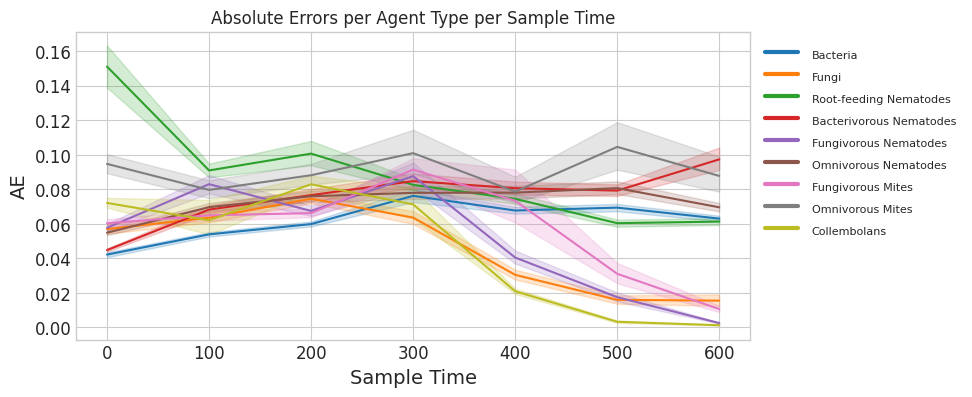

In [3]:
df1 = pd.read_csv('../experiments/analysis_out/abundances_sample_w_type.csv')
df1['distribution'] = pd.Series('clustered', index=df1.index).mask(df1['filename'].str.contains('random'), 'random')
df1['sampling_strat'] = 'w'
df2 = pd.read_csv('../experiments/analysis_out/abundances_sample_reg_type.csv')
df2['distribution'] = pd.Series('clustered', index=df2.index).mask(df2['filename'].str.contains('random'), 'random')
df2['sampling_strat'] = 'reg'
# Combine df1 and df2 into a single DataFrame
df_combined = pd.concat([df1, df2])
df_combined['setup'] = df_combined["distribution"] + df_combined["sampling_strat"]

fig = plt.figure(figsize=(8.69,2))

g=sns.lineplot(x='sample_time', y='ae', hue='type_id', palette=sns.color_palette("tab10")[:9], data=df_combined)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
g.set_xlabel('Sample Time')
g.set_ylabel('AE')
for lh in g.legend_.legend_handles:
    lh.set_linewidth('3')
g.legend_.set_title('')
new_labels = ["Bacteria", "Fungi", "Root-feeding Nematodes", "Bacterivorous Nematodes", "Fungivorous Nematodes", "Omnivorous Nematodes", "Fungivorous Mites", "Omnivorous Mites", "Collembolans"]
for t, l in zip(g.legend_.texts, new_labels):
    t.set_text(l)
    t.set_fontsize('8')
g.set_title('Absolute Errors per Agent Type per Sample Time')
plt.savefig("6-sample_time.pdf", format="pdf", bbox_inches="tight")

In [ ]:
fig = plt.figure(figsize=(8.69,2))
cp = [(0.9295040369088812, 0.9295040369088812, 0.9295040369088812), (1.0, 0.4980392156862745, 0.054901960784313725), (0.9295040369088812, 0.9295040369088812, 0.9295040369088812), (0.9295040369088812, 0.9295040369088812, 0.9295040369088812), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.9295040369088812, 0.9295040369088812, 0.9295040369088812), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.9295040369088812, 0.9295040369088812, 0.9295040369088812), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333)]


g=sns.lineplot(x='tick', y='x', hue='type', palette=cp, data=df.groupby(['type', 'tick']).count())
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
g.set_xlabel('Time Step')
g.set_ylabel('Count')
g.set_ybound(0, 10000)
for lh in g.legend_.legend_handles:
    lh.set_linewidth('3')
g.legend_.set_title('')
new_labels = ["Bacteria", "Fungi", "Root-feeding Nematodes", "Bacterivorous Nematodes", "Fungivorous Nematodes", "Omnivorous Nematodes", "Fungivorous Mites", "Omnivorous Mites", "Collembolans"]
for t, l in zip(g.legend_.texts, new_labels):
    t.set_text(l)
    t.set_fontsize('8')
g.set_xbound(200, 600)
g.set_title('Counts per Agent Type per Time Step')
plt.savefig("6-sample_counts.pdf", format="pdf", bbox_inches="tight")

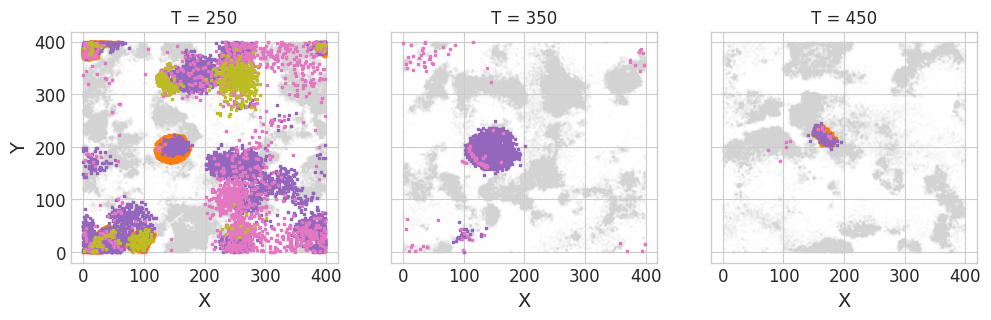

In [5]:
from matplotlib import colormaps
colors = colormaps['tab10'].colors
df = pd.read_csv('../blossom/hpc/outputs/clustered_1.csv')
fig, ax = plt.subplots(1, 3, figsize=(11.69, 3))

df1 = df[df["tick"] == 250]
df2 = df[df["tick"] == 350]
df3 = df[df["tick"] == 450]

for t in np.unique(df1["type"]):
    subset_type = df1[df1['type'] == t]
    if t in [1, 4, 6, 8]:
        ax[0].scatter(rand_jitter(subset_type['x']), rand_jitter(subset_type['y']), color=colors[t], label=t, s=1, marker='s')
    else:
        ax[0].scatter(rand_jitter(subset_type['x']), rand_jitter(subset_type['y']), color='lightgrey', label=t, s=1, marker='s', alpha=0.005)
ax[0].set_title(f'T = 250')
ax[0].set_xlabel('X')
ax[0].set_xticks([0, 100, 200, 300, 400])
ax[0].set_ylabel('Y')

for t in np.unique(df2["type"]):
    subset_type = df2[df2['type'] == t]
    if t in [1, 4, 6, 8]:
        ax[1].scatter(rand_jitter(subset_type['x']), rand_jitter(subset_type['y']), color=colors[t], label=t, s=1, marker='s')
    else:
        ax[1].scatter(rand_jitter(subset_type['x']), rand_jitter(subset_type['y']), color='lightgrey', label=t, s=1, marker='s', alpha=0.005)
ax[1].set_title(f'T = 350')
ax[1].set_xlabel('X')
ax[1].set_xticks([0, 100, 200, 300, 400])
ax[1].set_ylabel('')
ax[1].set_yticklabels([])

for t in np.unique(df3["type"]):
    subset_type = df3[df3['type'] == t]
    if t in [1, 4, 6, 8]:
        ax[2].scatter(rand_jitter(subset_type['x']), rand_jitter(subset_type['y']), color=colors[t], label=t, s=1, marker='s')
    else:
        ax[2].scatter(rand_jitter(subset_type['x']), rand_jitter(subset_type['y']), color='lightgrey', label=t, s=1, marker='s', alpha=0.005)
ax[2].set_title(f'T = 450')
ax[2].set_xlabel('X')
ax[2].set_xticks([0, 100, 200, 300, 400])
ax[2].set_ylabel('')
ax[2].set_yticklabels([])

plt.savefig("6-sample-time-hms.pdf", format="pdf", bbox_inches="tight")
plt.savefig("6-sample-time-hms.png", format="png", bbox_inches="tight")